In [28]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import os

import cv2

import numpy as np

import matplotlib.pyplot as plt

from keras.utils import np_utils

import pandas as pd


from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

# Import tensorflow as the backend for Keras



# Import required libraries for cnfusion matrix

from sklearn.metrics import classification_report,confusion_matrix

import itertools
import os
from tqdm import tqdm_notebook, tnrange
from tqdm import tqdm

In [0]:
data=pd.read_csv("/content/gdrive/Team Drives/資料探勘課程專區/2019DM/dataset/winequality-red.csv",sep=";")

In [37]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
col=list(data.columns)

In [0]:
del col[11]#刪去quality

In [44]:
col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [0]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table 
from sklearn.cross_validation import #用於分割資料
#feature_cols = ["fixed acidity","specific gravity","blood glucose random","packed cell volume"]
x=sm.add_constant(data1_new[feature_cols])
y=data1_new['age']
X_train,X_test, y_train, y_test = train_test_split(x, y, 
test_size = 0.25, random_state = 2018)#將數據分為訓練及待預測數集
regr=sm.OLS(y_train,X_train)#建立線性模型                              
res=regr.fit() 
res.summary()
predata=res.predict(X_test)#以X_test數據帶入模型作預測


In [0]:
y=data['quality']

In [0]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table 
from sklearn.model_selection import train_test_split
x=sm.add_constant(data[col])

In [43]:
x.head()

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [63]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 2418)#將數據分為訓練及待預測數集
regr=sm.OLS(y_train,X_train)#建立線性模型                              
res=regr.fit() 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     70.16
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          3.68e-124
Time:                        11:45:17   Log-Likelihood:                -1323.4
No. Observations:                1359   AIC:                             2671.
Df Residuals:                    1347   BIC:                             2733.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   29.6009     22.755      1.301      0.194     -15.038      74.240
fixed acidity            0.0281      0.028      1.007      0.314      -0.027       0.083
volatile acidity        -1.0905      0.132     -8.276      0.000      -1.349      -0.832
citric acid             -0.1960      0.158     -1.241      0.215      -0.506       0.114
residual sugar           0.0133      0.016      0.816      0.415      -0.019       0.045
chlorides               -2.0015      0.441     -4.535      0.000      -2.867      -1.136
free sulfur dioxide      0.0044      0.002      1.914      0.056      -0.000       0.009
total sulfur dioxide    -0.0032      0.001     -4.084      0.000      -0.005      -0.002
density                -25.6735     23.227     -1.105      0.269     -71.239      19.892
pH                      -0.3586      0.207     -1.735      0.083      -0.764       0.047
sulphates                0.9333      0.121      7.732      0.000       0.697       1.170
alcohol                  0.2693      0.029      9.426      0.000       0.213       0.325
==============================================================================
Omnibus:                       25.706   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.224
Skew:                          -0.176   Prob(JB):                     3.04e-09
Kurtosis:                       3.754   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
pre=(res.predict(X_test))


In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [0]:
a=confusion_matrix(pre, y_test)

In [54]:
y_test.unique()

array([5, 6, 7, 8, 4, 3])

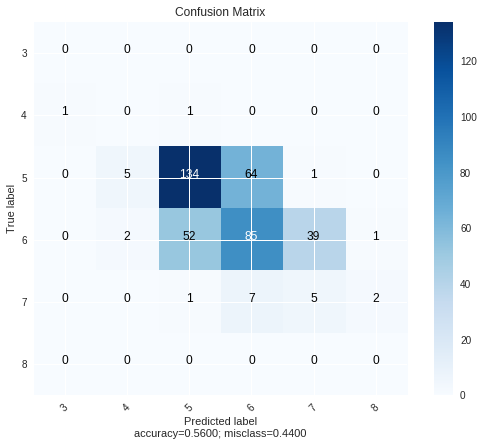

In [55]:
plot_confusion_matrix(cm           = a, 
                      normalize    = False,
                      target_names = ['3', '4','5','6','7','8'],
                      title        = "Confusion Matrix")  

重要參數挑選

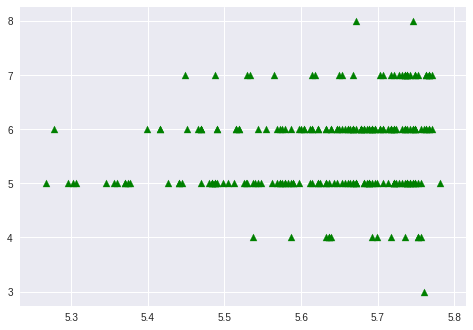

In [64]:
from sklearn.linear_model import Lasso
lasso = Lasso()
model=lasso.fit(X_train, y_train)
a=model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(a,y_test,marker="^",c="g")
mse = np.mean((a- y_test) ** 2)


In [65]:
lasso.coef_

array([ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.00354228, -0.        , -0.        ,
        0.        ,  0.        ])

In [0]:
residual=pre.astype(float)-y_test.astype(float)

In [86]:
#normality
from scipy import stats
#b = np.random.normal(2, 1, size=pts)
#x = np.concatenate((a, y_test))
k2, p = stats.normaltest(residual)
alpha = 1e-3
print("p = {:g}".format(p))
#p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
  print("The null hypothesis can be rejected")
else:
  print("The null hypothesis cannot be rejected")

p = 0.374972
The null hypothesis cannot be rejected


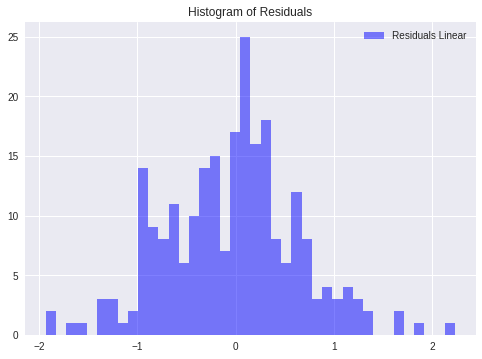

In [85]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(residual,bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');
